<a href="https://colab.research.google.com/github/lasheralberto/mygit/blob/main/Data_cleaning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import os


In [20]:
pwd

'/content'

In [21]:
df=pd.read_csv("/content/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [22]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [23]:
df.shape

(303, 14)

In [24]:
df.dropna()
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


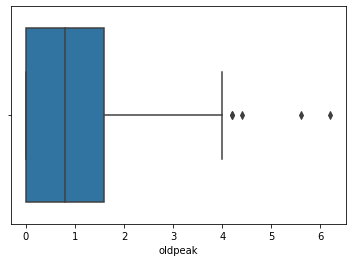

In [25]:
sns.boxplot(x=df["oldpeak"])

In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,NaN,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,NaN,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483
cp,-0.078448,-0.121648,1.000000,0.083476,-0.047258,NaN,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115
trestbps,0.266698,-0.001433,0.083476,1.000000,0.126974,NaN,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560
chol,0.172527,-0.093058,-0.047258,0.126974,1.000000,NaN,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,NaN,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641
thalach,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,NaN,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870
exang,0.123981,0.208950,-0.351256,-0.019909,0.019446,NaN,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,NaN,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194


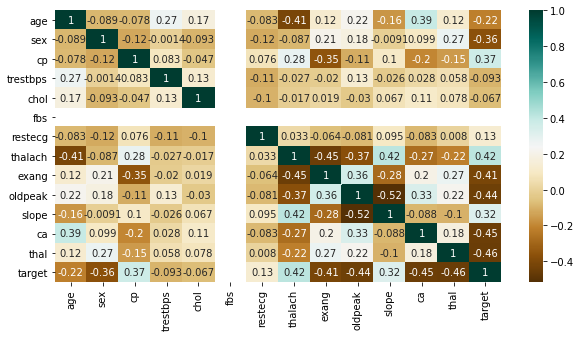

In [28]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c